In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 대우데이터
1. 봉급생활자, 자영업자의 월소득 평균, 중앙값, 표준편차를 구하라. 봉급생활자와 자영업자간 근로소득의 분포가 어떻게 다른지 논하라


2. 봉급생활자와 자영업자 집단에서 `연령`과 `소득` 의 관계를 분석하고자 한다. 하부 집단별로 평균 근로소득을 구하고, 연령과 소득의 관계를 그래프로 표현하라. 한 개인의 소득이 연령에 따라 어떻게 변화해 가는지 알 수 있는가? 있다면 관계를 설명하고 없다면 이유를 말하라.


3. 음주가 소득에 미치는 영향을 분석하고자 한다. 음주와 소득의 관계에 혼동요인으로 작용할 가능성이 있는 변수를 둘 이상 제시하고 이유를 설명하라. 음주자는 P2 = 1, 비음주자는 P2 = 2 다.
---
데이터 상세
* JOB1 : 1. 봉급생활 2. 자영업
* P19 : 봉급생활자 평균 월 수입
* P29 : 자영업자 평균 월 수입
* AGE1 : 나이( 1인 가구는 AGE2 가 결측치)
* P : 1. 음주 2. 비음주

In [13]:
# load data
data_route = r'D:\document\data\daewoo.xls'
df_daewoo = pd.read_excel(data_route, encoding='utf-8-sig')

1. 봉급생활자의 평균 소득은 109만원, 표준편차는 39만원이다.자영업자의 평균 소득은 155만원, 표준편차는 87만원이다. 봉급생활자는 자영업자에 비해 평균적으로 월 수입이 적지만 망할 가능성도 낮다고 볼 수 있다.

,Salary,Owner
count,235.000000,146.000000
mean,109.736170,155.328767
std,39.159527,87.520568
min,35.000000,5.000000
25%,80.000000,100.000000
50%,100.000000,140.000000
75%,130.000000,200.000000
max,300.000000,500.000000


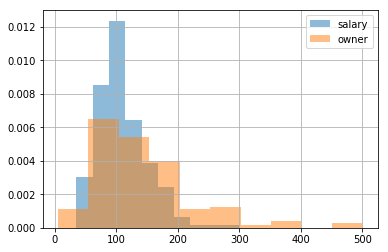

In [38]:
ser_salary_income = df_daewoo[df_daewoo['JOB1'] == 1]['P19']
ser_owner_income = df_daewoo[df_daewoo['JOB1'] == 2]['P29']

list_income_summary = [ser_salary_income.describe(), ser_owner_income.describe()]
df_income_summary = pd.concat(list_income_summary, axis = 1)
df_income_summary.rename(columns = {'P19': 'Salary', 'P29':'Owner'}, inplace=True)
display(df_income_summary)

ser_salary_income.hist(alpha=.5, label='salary',density=True)
ser_owner_income.hist(alpha=.5, label='owner', density=True)
plt.legend()
plt.show()

2. 봉급생활자의 월급 평균은 전 연령에서 큰 차이가 없어보인다. 45세까지는 증가하고 이후부터 감소하다가 다시 증가한다. 반면 자영업자의 월 평균 소득은 [35, 40) 구간에서 가장 높았으며 나머지 구간에서는 패턴을 찾을 수 없다. 해당 데이터는 횡단면자료기 때문에 개인의 연령에 따른 소득 변화를 알아볼 수 없다. 개인별 월 평균 소득 시계열자료나 종적자료가 있으면 분석할 수 있다.

In [53]:
# 구간 나누기
age_cut = pd.cut(df_daewoo['AGE1'], np.array([25, 30, 35, 40, 45, 50, 55, 60]), right=False)
df_daewoo['AGE_CUT'] = age_cut

df_salary = df_daewoo[df_daewoo['JOB1'] == 1]
df_owner = df_daewoo[df_daewoo['JOB1'] == 2]

# 연령에 따른 월 평균 소득
salary_age_cut_mean = df_salary.groupby(['AGE_CUT'])['P19'].mean()
owner_age_cut_mean = df_owner.groupby(['AGE_CUT'])['P23'].mean()

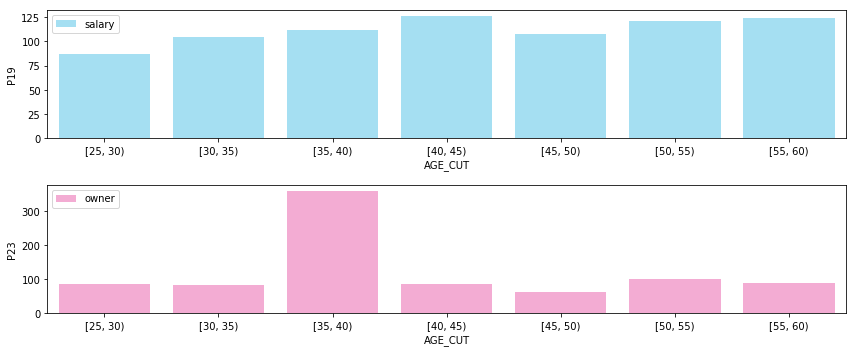

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
sb.barplot(x=salary_age_cut_mean.index, y=salary_age_cut_mean, 
           color = 'deepskyblue', alpha=.4, label='salary', ax=ax[0])
sb.barplot(x=owner_age_cut_mean.index, y=owner_age_cut_mean,
           color = 'deeppink', alpha=.4, label='owner', ax=ax[1])

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
# P19와 P29를 합친다.


0       True
1       True
2       True
3       True
4       True
5       True
6      False
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16     False
17     False
18      True
19      True
20      True
21     False
22     False
23      True
24      True
25     False
26      True
27     False
28      True
29     False
30     False
31      True
32      True
33      True
34     False
35     False
36      True
37      True
38     False
39     False
40     False
41      True
42     False
43      True
44     False
45      True
46      True
47      True
48     False
49      True
50     False
51     False
52      True
53      True
54     False
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62     False
63      True
64     False
65     False
66     False
67     False
68      True
69      True
70      True
71      True
72     False
73      True
74      True
75      True
76      True

## 강남구 아파트 가격데이터

In [23]:
type(ser_salary_income.describe())

pandas.core.series.Series